# Mini Project 3: Bank Fraud Detection

#### 1. Given the data below, please classify the two cluster data and find the boundary line to devide the two groups. Use visualization to show your answer. 

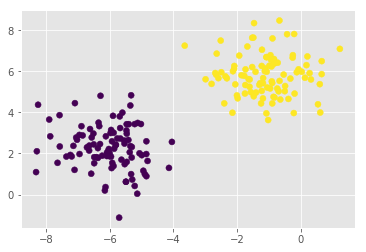

In [3]:
## import the necessary packages
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

X,Y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, random_state=1234)
plt.scatter (X[:,0],X[:,1],c=Y)

In [2]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1.0).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=1.0).fit(X, Y)
lin_svc = svm.LinearSVC(C=1.0).fit(X, Y)

In [3]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [4]:
## concatenate numpy array:
## numpy.concatenate: https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html
np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)),axis=1)

array([[-9.31746603, -2.12134124],
       [-9.29746603, -2.12134124],
       [-9.27746603, -2.12134124],
       ..., 
       [ 2.18253397,  9.45865876],
       [ 2.20253397,  9.45865876],
       [ 2.22253397,  9.45865876]])

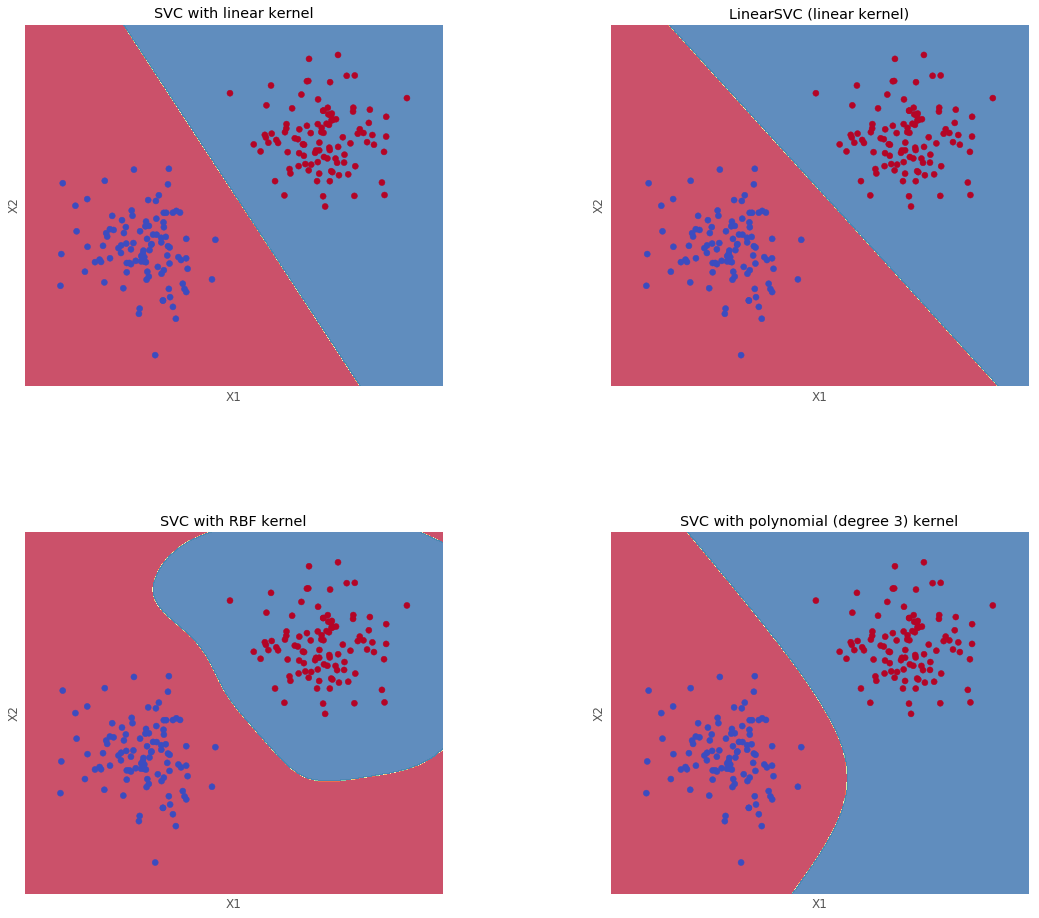

In [5]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

fig = plt.figure(figsize=(18, 16))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)),axis=1))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    # cmap=plt.cm.coolwarm，from color example code:
    # http://matplotlib.org/examples/color/colormaps_reference.html

    # Plot also the training points

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [ ]:
## 如何挑选哪个kernel 对不同的case？
## http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#polynomial

#### 2. In problem 1, we use classification method to classify two two-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Bank Fraud Detection Case where you will classify two multiple-feature groups.

**Data Description:**

**label.test.csv** - the test set, contains customer’s basic attributes and payment histories. You must predict whether these customers are credible or not.

**sample submission.csv** - a file showing the correct submission format. You must replace the NA’s with the predicted class labels. You should show your results by submitting the .csv file according to the format of this sample submission.csv.

**id**: A unique Id field which represents a customer

**X1**: Credit lineX2: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.X12- X17: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is creditable (1) or not (0).

This is a real problem to classify multi-feature data into two groups.



**Hint for steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
( You can google “Component Analysis with KMeans visuals – Kaggle” and learn how to do this step from Kaggle website)
4.	You don’t need to do PCA right now. 
5.	Choose the proper method to train the model:
binary classification Models: Logistic regression, Support vector machine, Naive Bayes, k-nearest neighbors, neural network, Decision tree…

6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.

**1. Load the data**

In [6]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
print (train_data.shape)
print (test_data.shape)

(25000, 25)
(5000, 24)


In [7]:
train_data.columns

Index(['id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
train_data.iloc[0:10,6:12]

,X6,X7,X8,X9,X10,X11
0,0,0,0,0,0,0
1,0,0,0,2,0,0
2,0,0,0,0,0,0
3,1,-2,-2,-1,0,0
4,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,2
6,0,-1,-1,-1,0,-1
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,-2,-2,-2,-2,-2,-2


In [9]:
train_data.dtypes

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [10]:
train_data.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

**2. Distinguish categorical and continuous variables**

In [11]:
cat_v = []
con_v = []
for c in train_data.columns:
    if len(train_data[c].value_counts().index)<=15:
        cat_v.append(c)
    else:
        con_v.append(c)
cat_v.remove('Y')
target = ['Y']

In [12]:
print("The continuous variables: ", con_v, "\n")
print("The categorical variables: ", cat_v)

The continuous variables:  ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'] 

The categorical variables:  ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


**3. Basic feature analysis**

i. Check the pattern differences between the training data and testing data

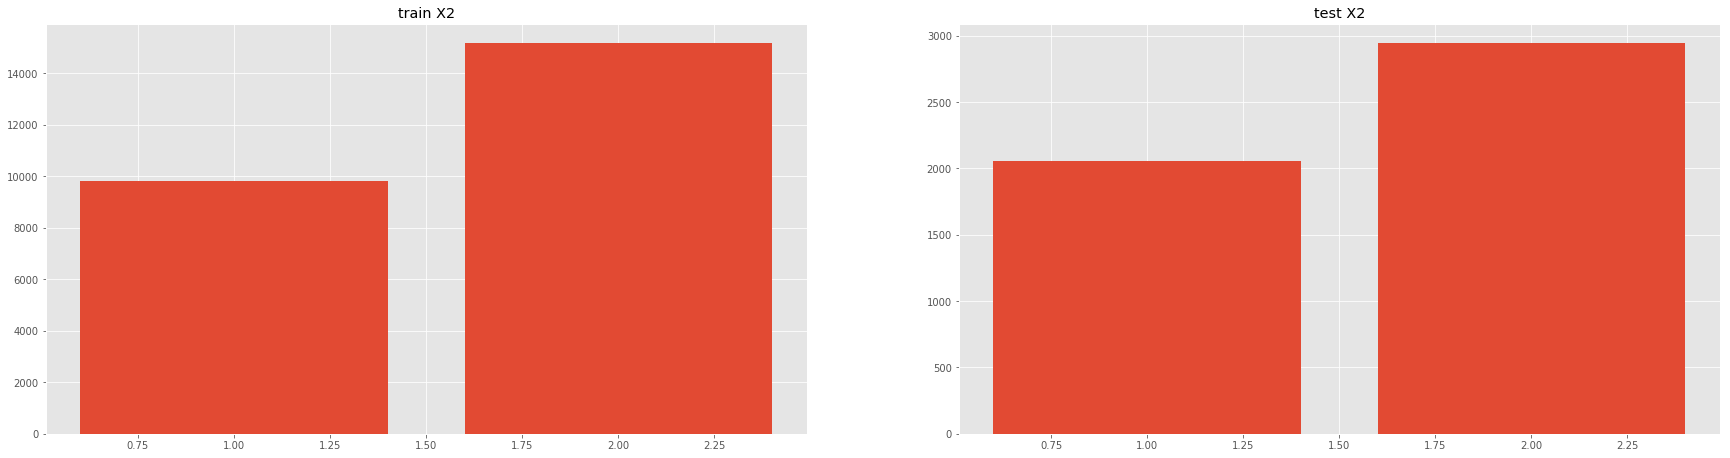

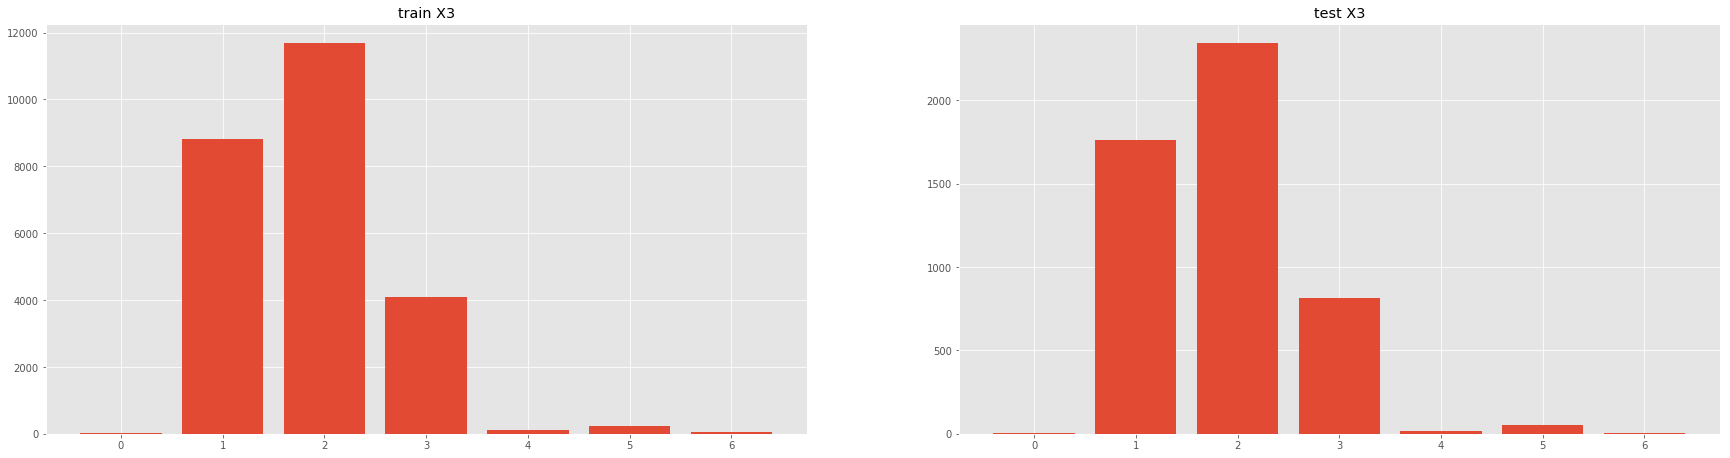

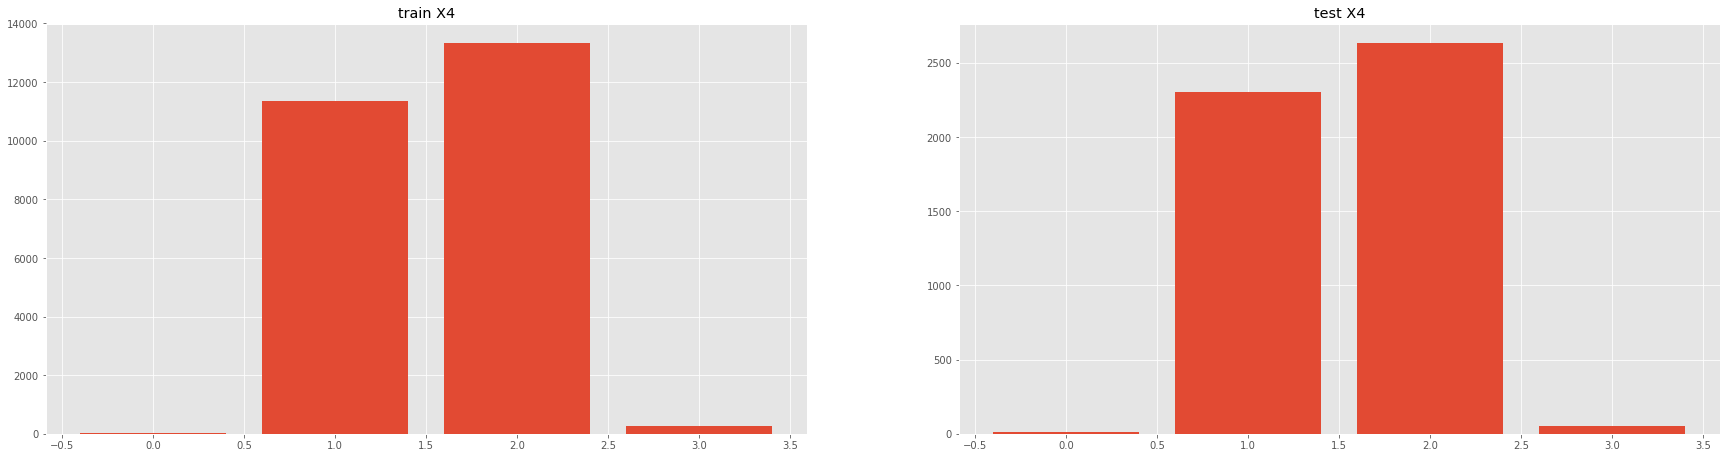

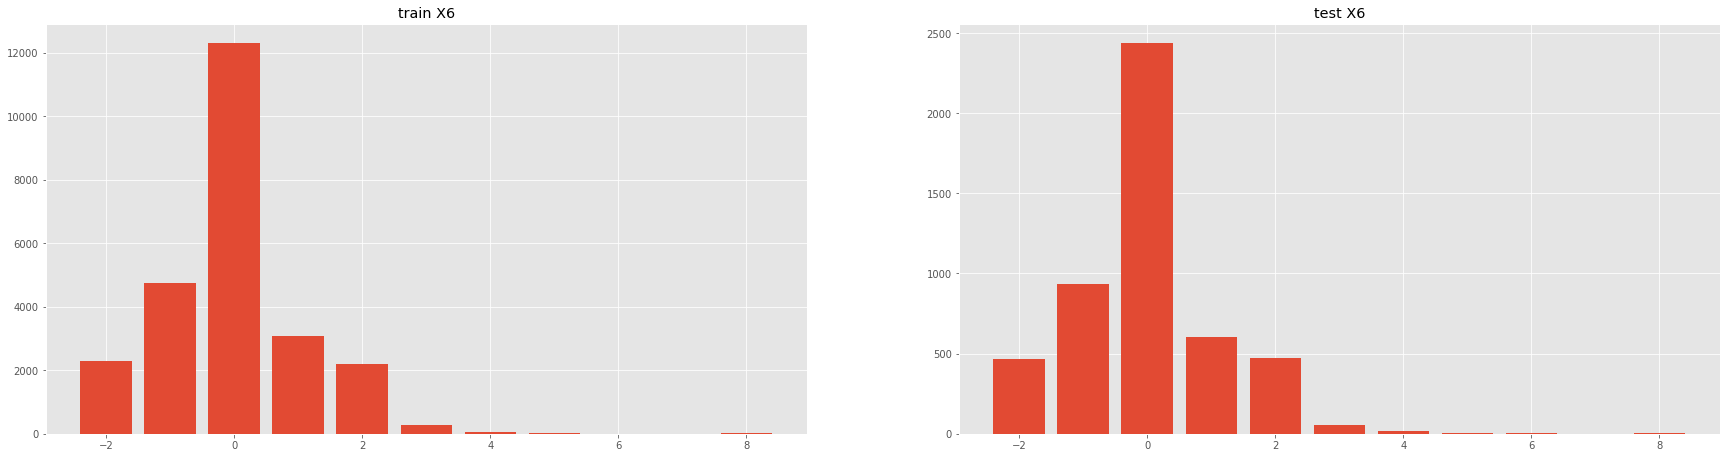

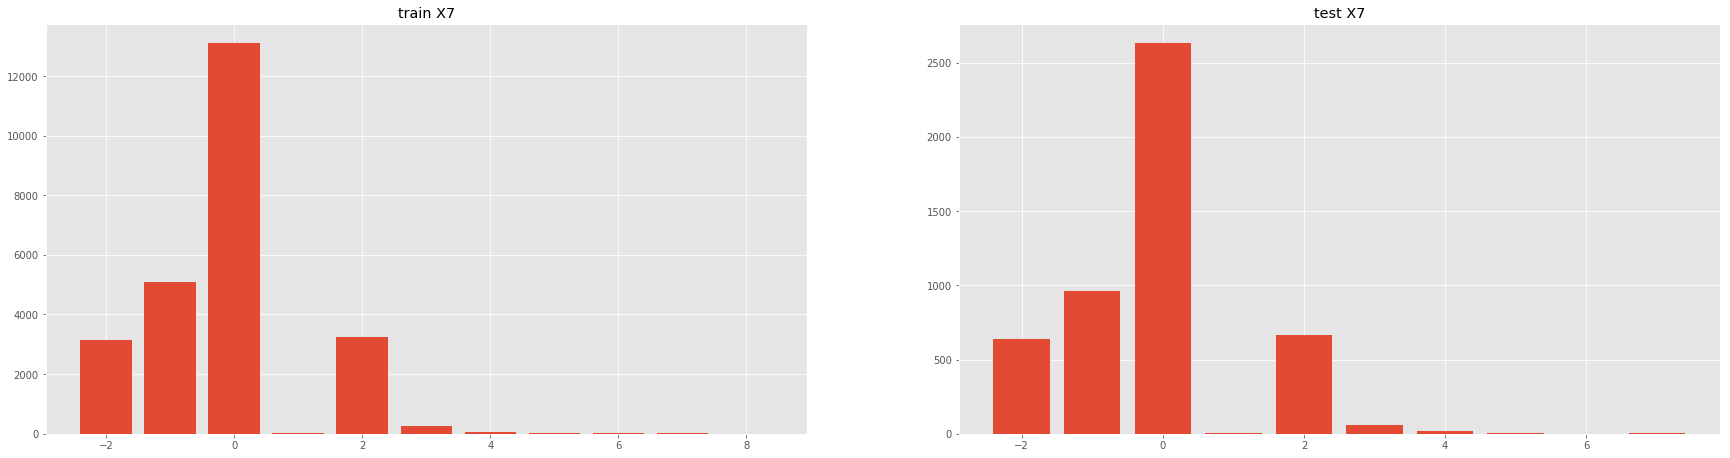

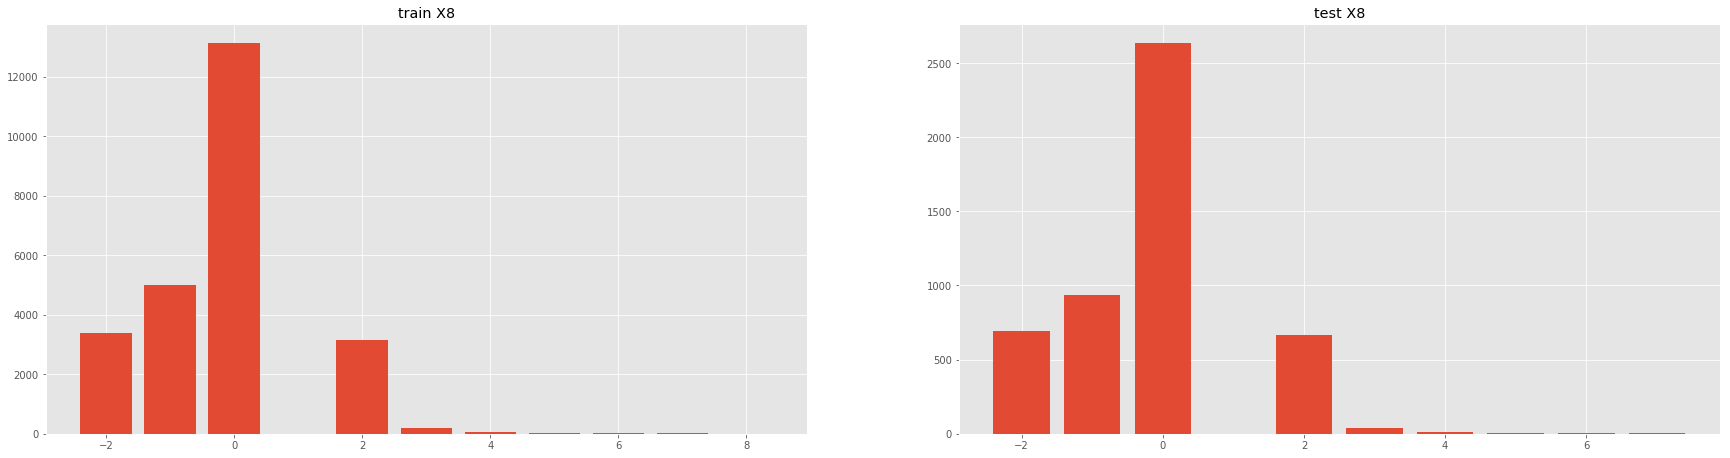

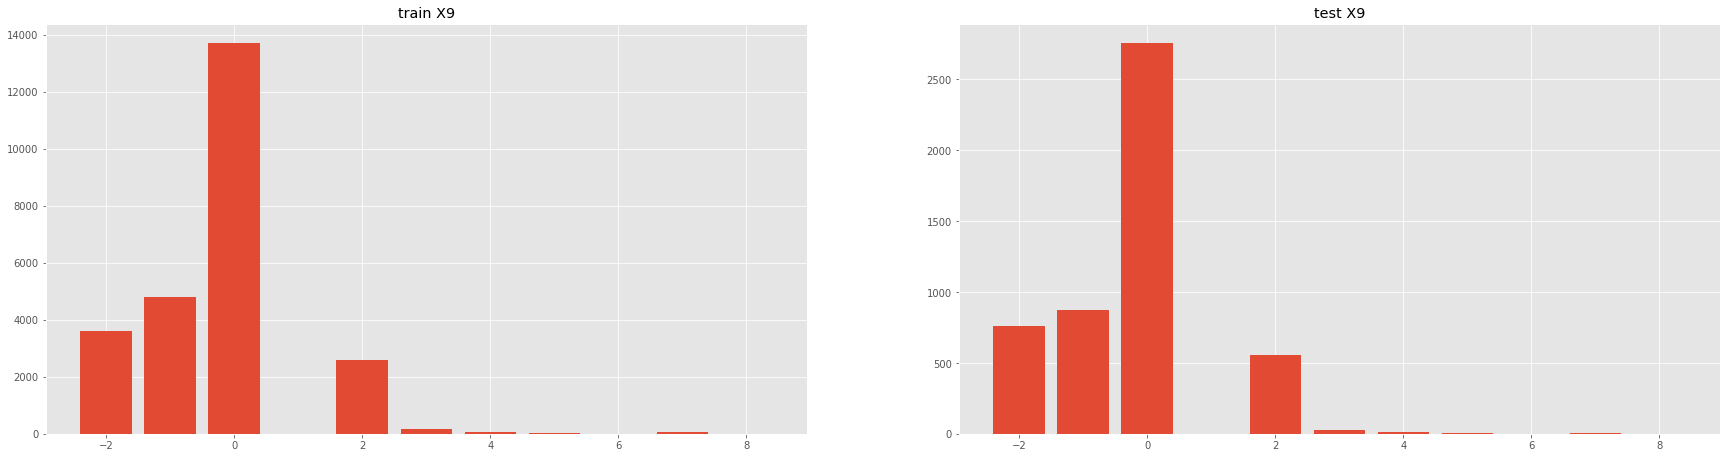

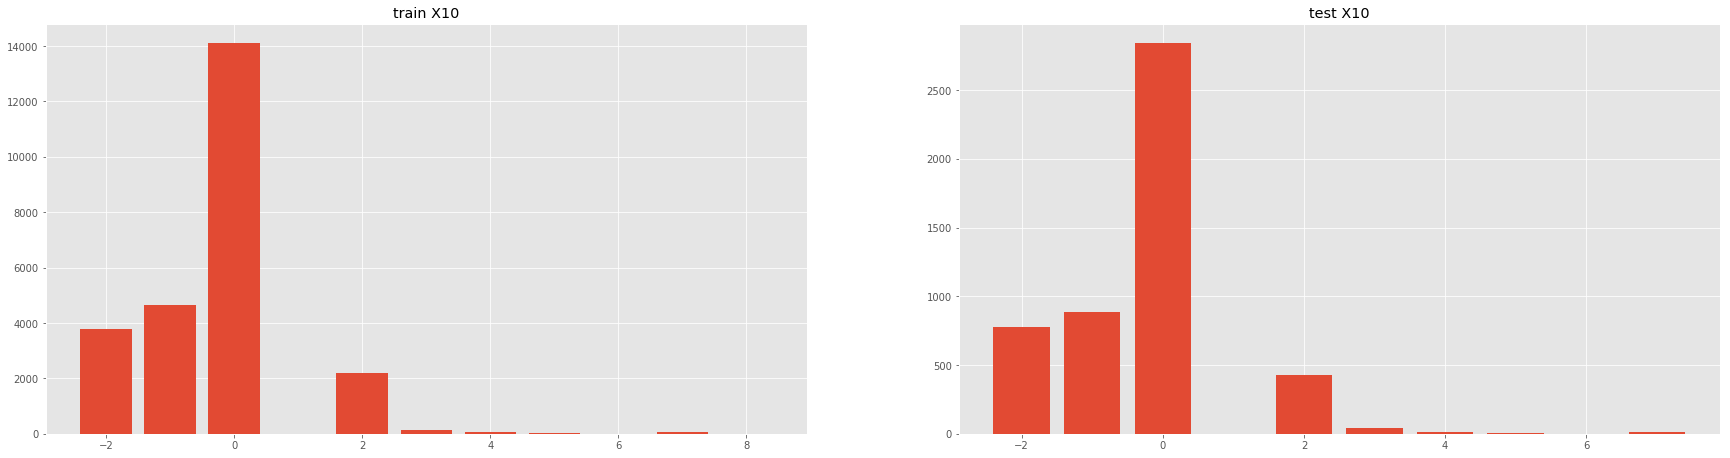

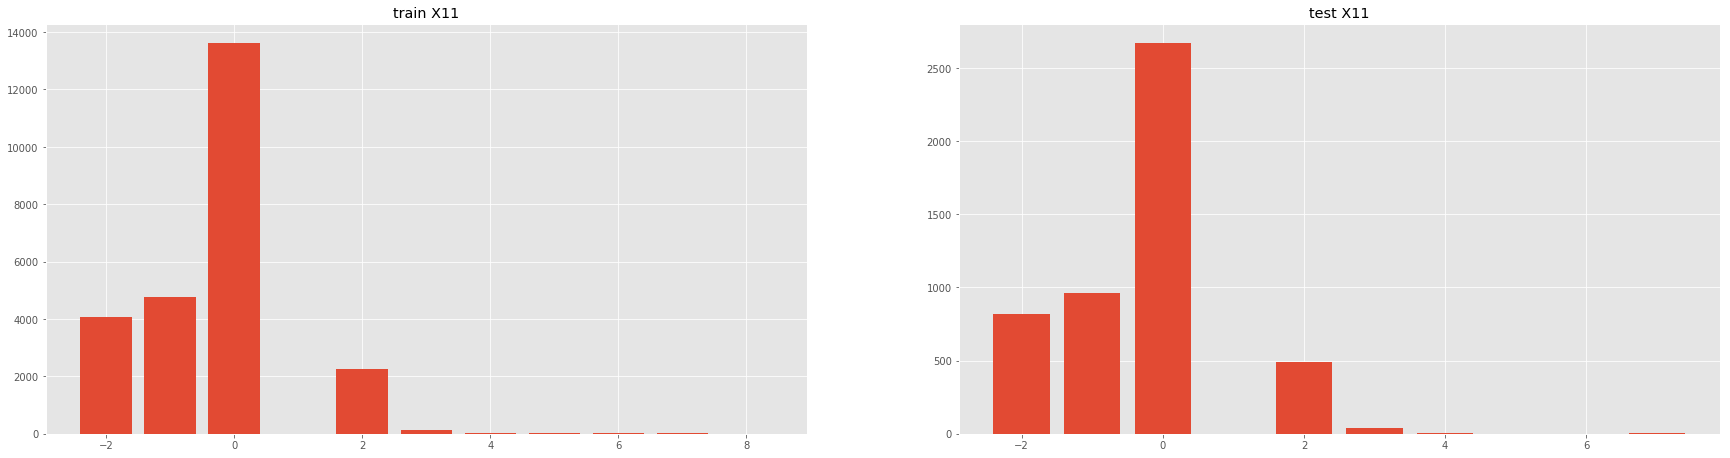

In [13]:
count=1
for i in range(len(cat_v)):
    fig = plt.figure(figsize=(30,80))
    plt.subplot(len(cat_v),2,count)
    plt.bar(train_data[cat_v[i]].value_counts().index, train_data[cat_v[i]].value_counts().values)
    plt.title("train "+cat_v[i])
    
    plt.subplot(len(cat_v),2,count+1)
    plt.bar(test_data[cat_v[i]].value_counts().index, test_data[cat_v[i]].value_counts().values)
    plt.title("test "+cat_v[i])
    count+=2

Things you need to know when we deal with categorical data:<br/>
https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

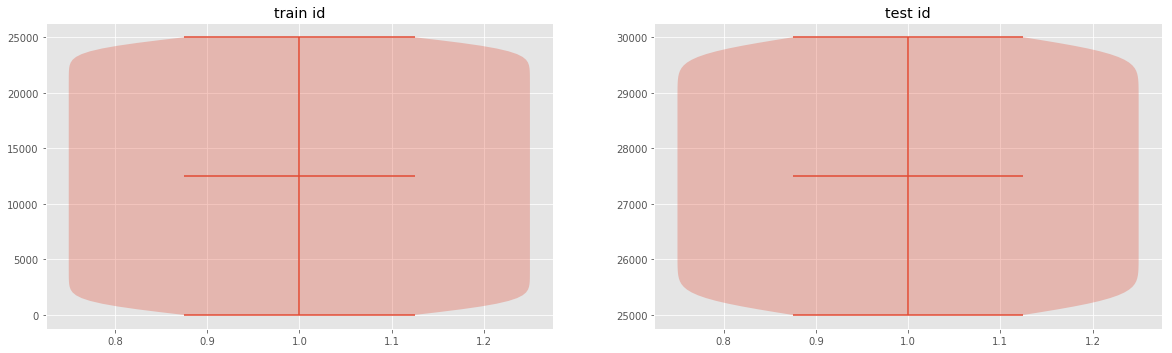

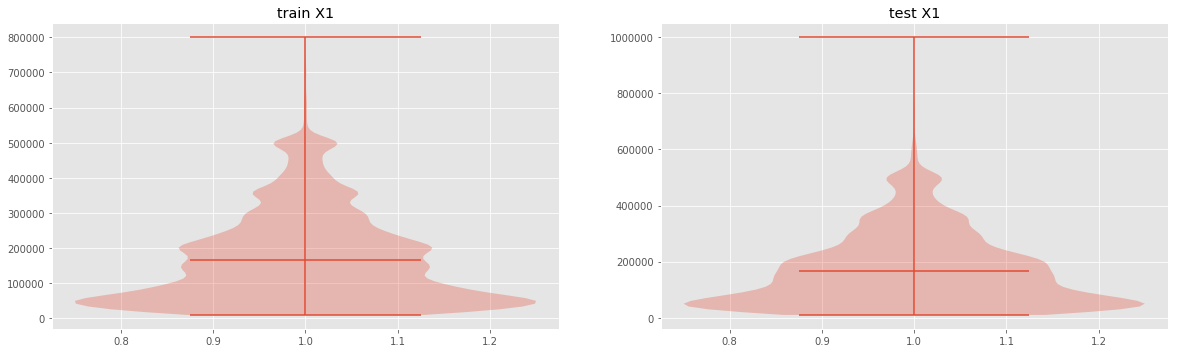

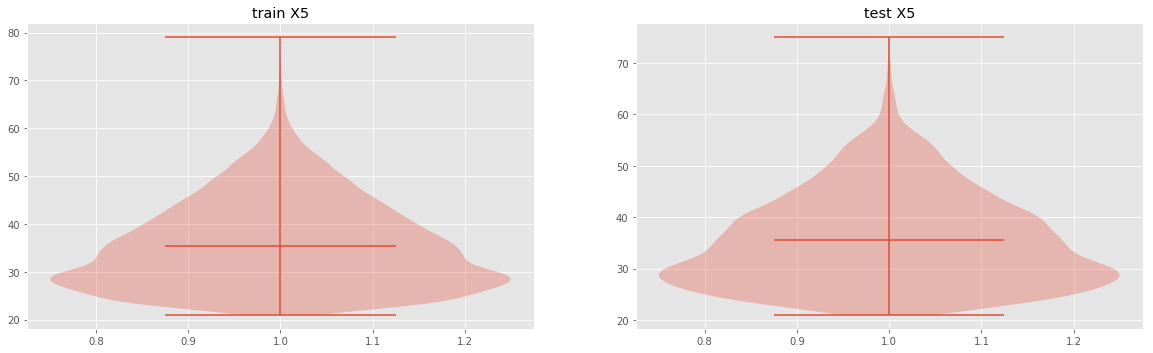

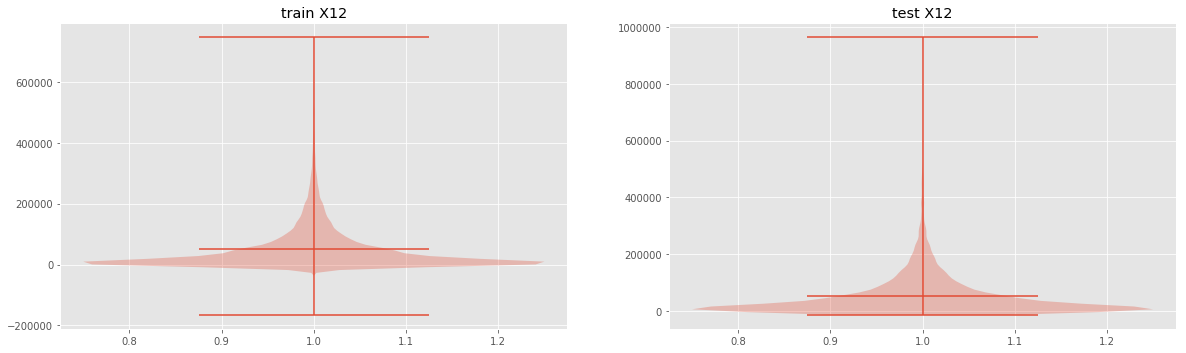

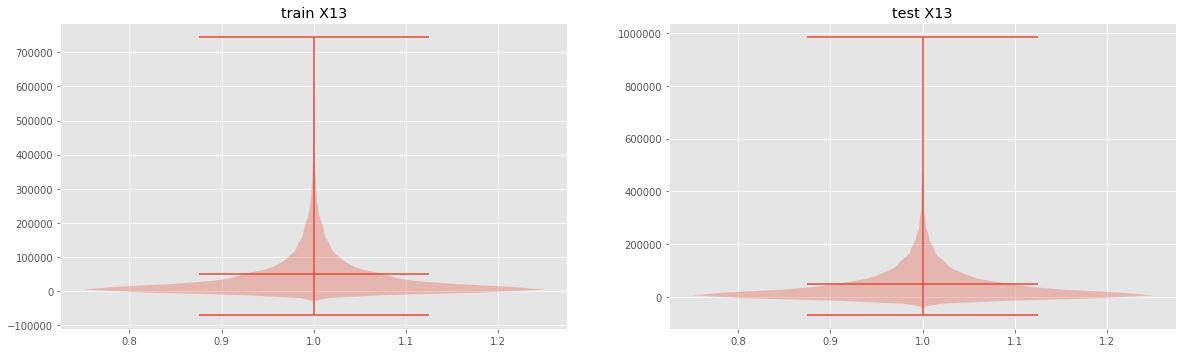

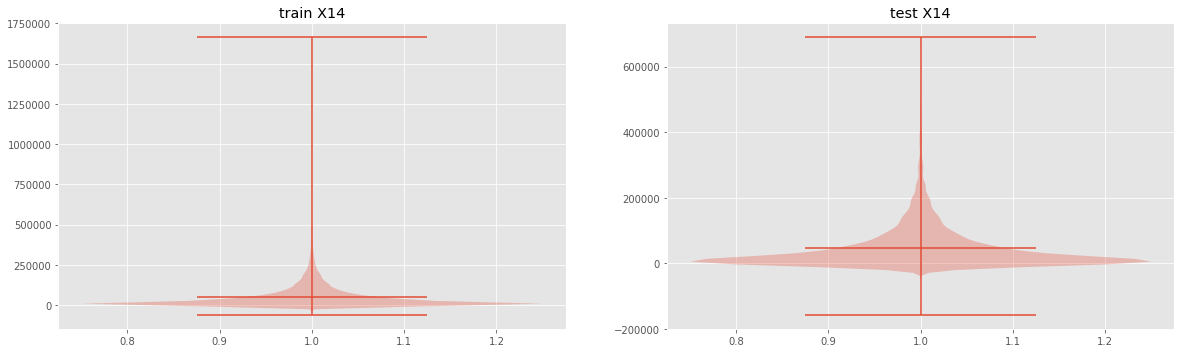

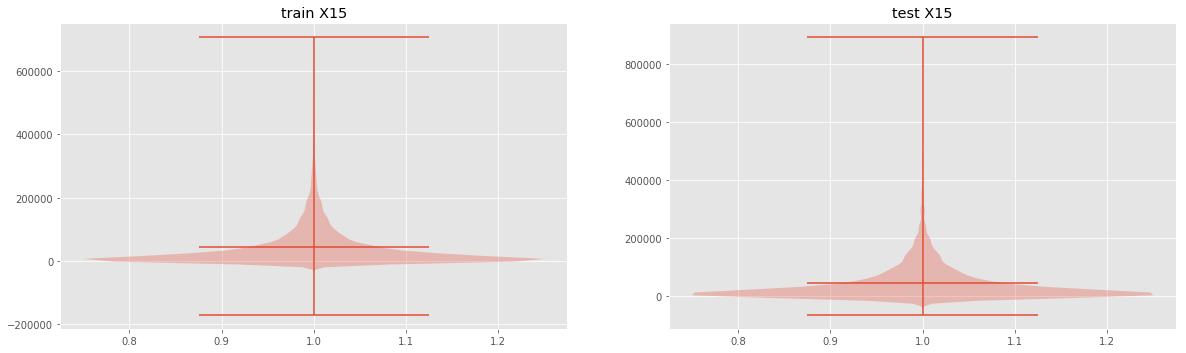

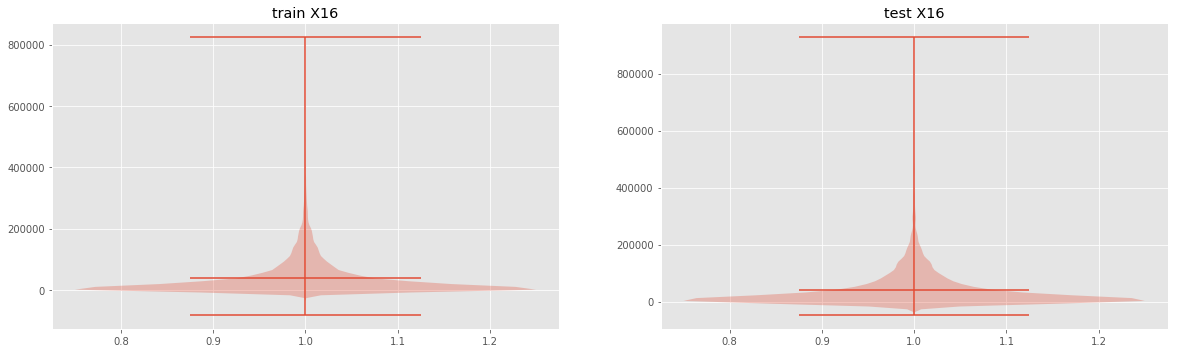

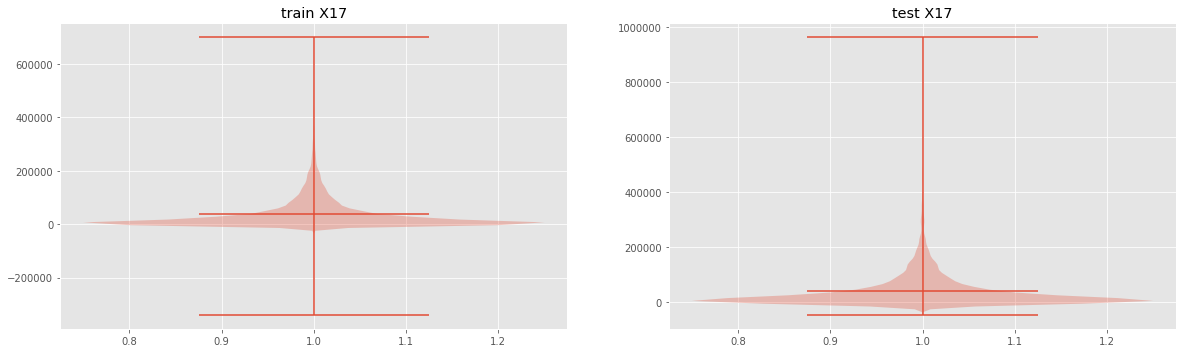

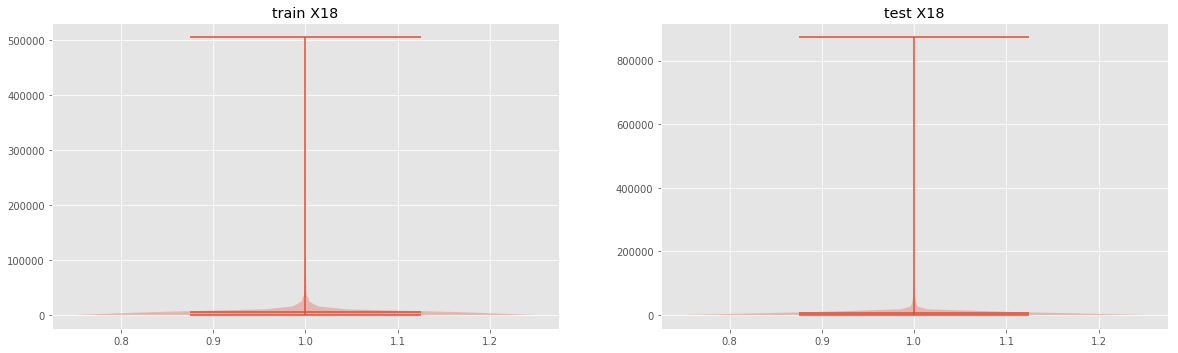

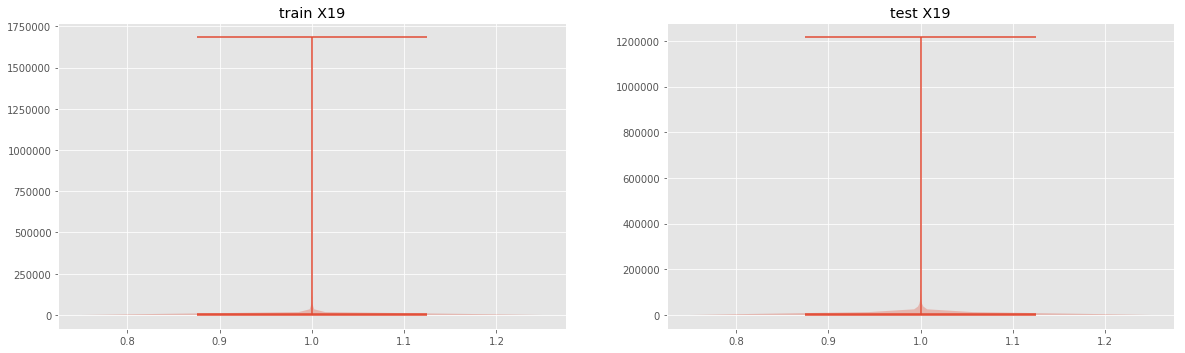

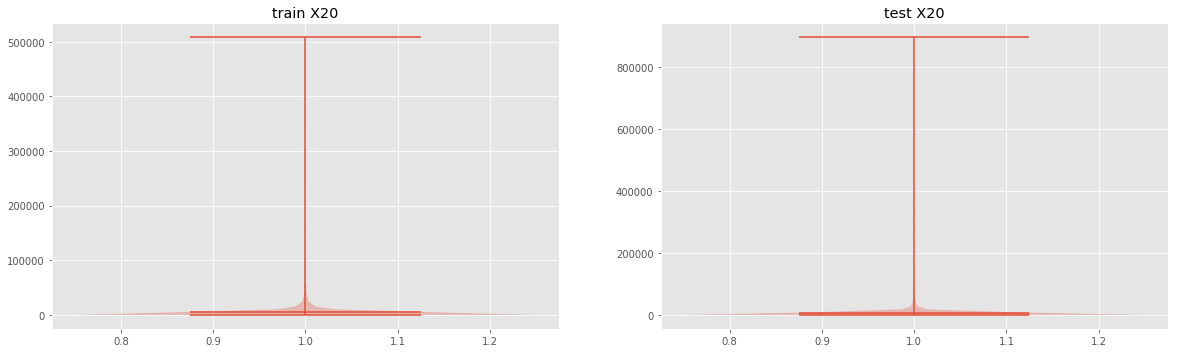

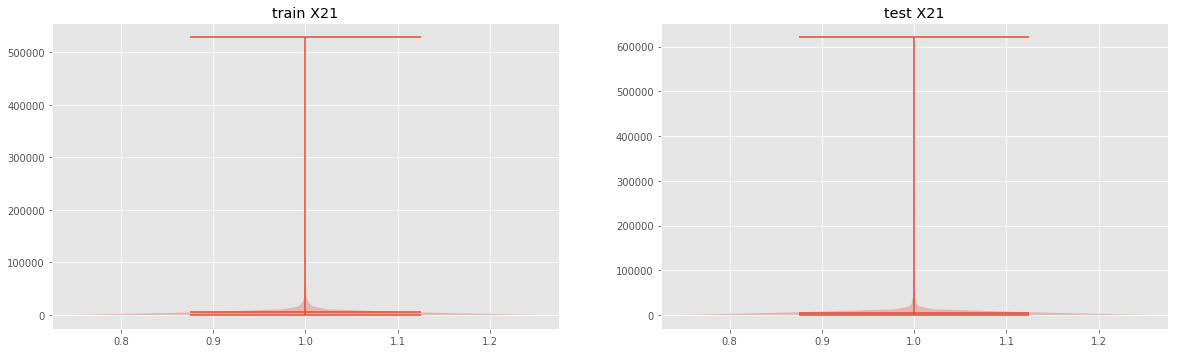

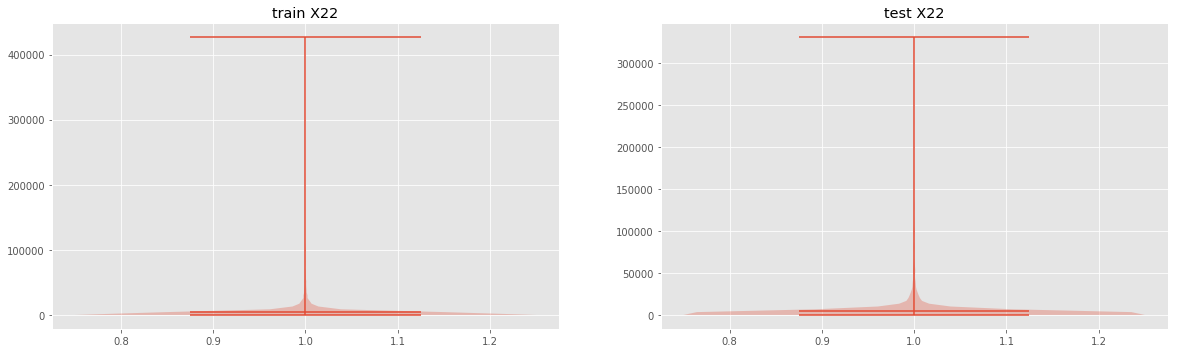

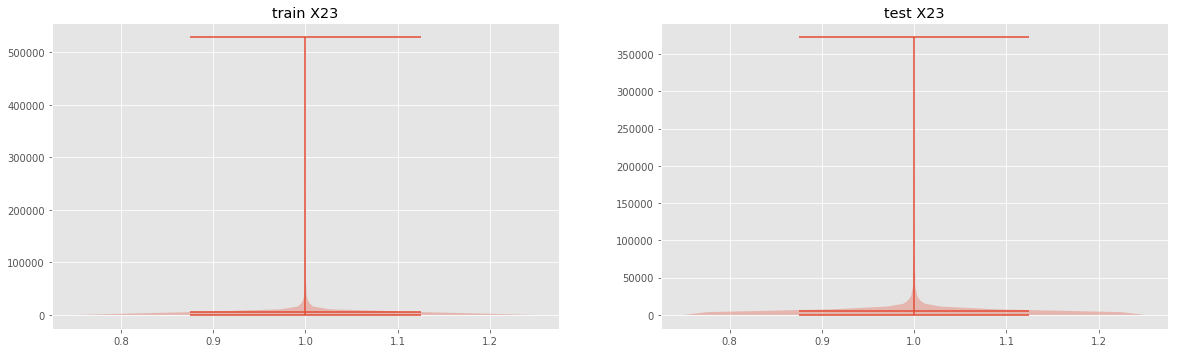

In [14]:
count=1
for i in range(len(con_v)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(con_v),2,count)
    plt.violinplot(train_data[con_v[i]],showmeans=True)
    plt.title("train "+con_v[i])
    
    plt.subplot(len(con_v),2,count+1)
    plt.violinplot(test_data[con_v[i]],showmeans=True)
    plt.title("test "+con_v[i])
    count+=2

Here you can use some data preprocessing techniques to deal with the continous data.<br/>
Some method to deal with continous data:<br/>
https://www.analyticsvidhya.com/blog/2015/11/8-ways-deal-continuous-variables-predictive-modeling/

ii. Check the if there are linear relationships between features

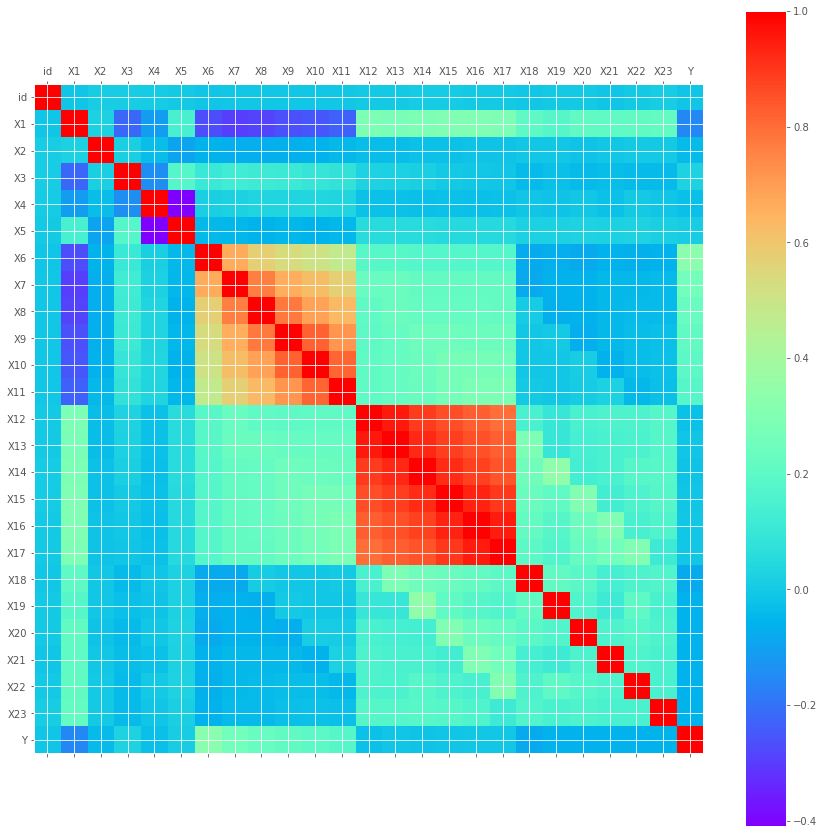

In [15]:
def plot_corr(df,size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(train_data)


1. Low correlation means there's no linear relationship, it doesn't mean there is no relationship.
2. Good feature subsets contain features highly correlated with the classification, yet uncorrelated to each other. 
3. multicollinearity makes some variables statistically insignificant when they should be significant. Without multicollinearity (and thus, with lower standard errors), those coefficients might be significant.

In [ ]:
## Is Y also considered as numeric?
## 如何处理强相关性？上次是把数据删掉 -PCA

iii. Check the pattern of the label

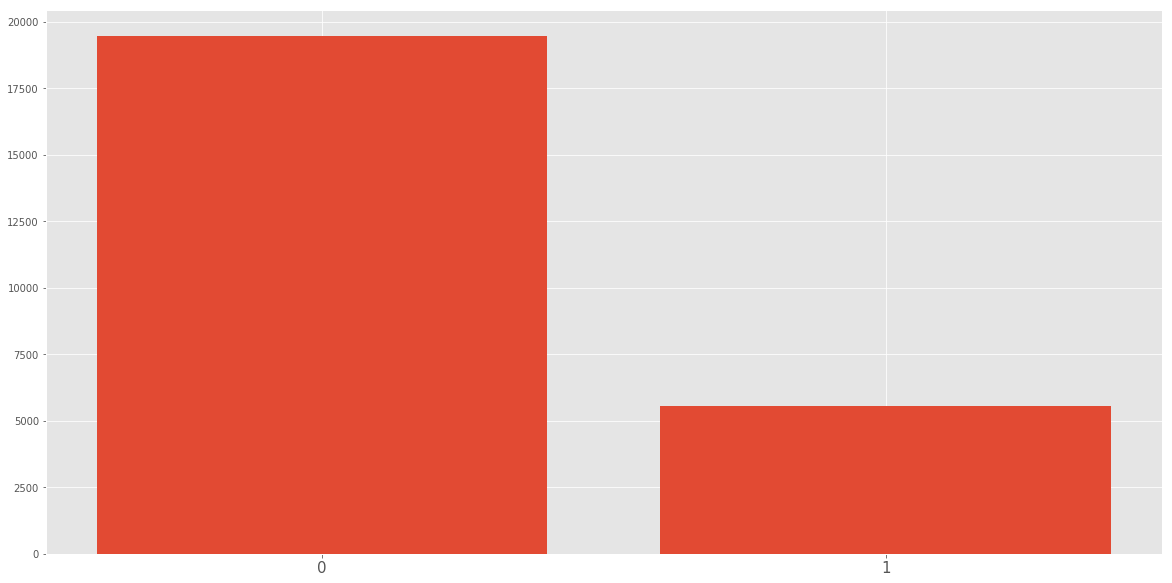

In [16]:
fig = plt.figure(figsize=(20,10))
plt.bar(train_data['Y'].value_counts().index, train_data['Y'].value_counts().values)
plt.xticks(train_data['Y'].value_counts().index,fontsize=15)
plt.show()

In [ ]:
## 多少算inbalance？ 
## recall 具体指什么？ - https://en.wikipedia.org/wiki/Precision_and_recall
## 可以再解释一下calss_weight={0:1, 1:3}是什么意思？权重提高的话，model会自动维持权重较高的参数的正确率，所以对与imbalance 数据有帮助
## 我们作业中也可以随便选取model吗？

Here we notice the label is imbalanced. It will harm our model if you don't deal it very well!

Method to deal with imbalanced data
1. Choose a good metrics: <br\>Confusion Matrix: recision/Recall/F1-score
2. Resampling Your Dataset:
  * You can add copies of instances from the under-represented class called over-sampling<br\>
  * use systematic algorithms to generate new instances: Synthetic Minority Over-sampling Technique<br\>
  * You can delete instances from the over-represented class, called under-sampling<br\>
  * imbalanced-learn package: https://github.com/scikit-learn-contrib/imbalanced-learn
3. Penalized Models:<br\>
比如在RandomForestClassifier里面调节class_weight={0:1,1:4}，LogisticRegression里调节 penalty, penalized-SVM
...

8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset:<br/>
http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

** 4. Build a baseline model**

Here I always choose random forest tree model as my first baseline model:
1. By principle since it randomizes the variable selection during each tree split it's not prone to overfit unlike other models.
2. You don't need to pre-precessing data too much.
3. I used to read that RF don't need CV because it has includes bootstrap sampling and random variable selection in the process of model fit.But still it is strongly recommended to do CV if you can.

In [17]:
from sklearn.model_selection import train_test_split
Y = train_data['Y']
X = train_data.drop(['Y', 'id'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3}) # 对label =1 的给多点weight,因为它们数量很少
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.95      0.88      3923
          1       0.60      0.30      0.40      1077

avg / total       0.78      0.81      0.78      5000



If you want to use Linear Regression, Logistic Regression, SVM...(Distanced based model), you need to do on-hot-encoding to categorical features first.

why we need to do label encoding and one-hot-encoding:<br/>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html<br/>
https://achyutjoshi.github.io/datascience/one-hot-encoding<br/>

However, we will cover this part in our next homework.

**5. Basic parameter tuning: Grid Searching**

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
## week2 Sunday : feature selection, model evaluation ,model selection(using cross_val_score)
## 这里我们只是对RandomForest 这一个方法进行GridSearch cross-valdation 去确认best parameter combination
## downside for GridSearch: if the parameters are not fixed, eg you don't know how many tress. It takes long time 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv) # cv = cv is the # of folds of cross validation 
    # Fit Grid Search Model
    model.fit(x_train, y_train)   
    return model

In [ ]:
## Grid search is actually using cross validation method to tune parameters, 
## which is to scan all posible parameter combinations and return the best one. Is that right? 

In [20]:
# n_estimators is the # of dicision tree
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(X.values
            , Y.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini, score=0.786199, total=   7.2s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini, score=0.798215, total=   7.2s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=100, class_weight

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.8s


[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.786820, total=  21.8s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.787760, total=  21.8s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.799774, total=  22.0s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.791607, total=  21.5s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.8s


[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.789000, total=  21.8s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.784716, total=   9.7s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.800628, total=  13.8s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.790156, total=  13.8s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.792642, total=  15.3s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini, score=0.783937, total=  42.2s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, c

[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.2min remaining:   42.1s


[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini, score=0.788561, total=  47.0s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.787667, total=  35.2s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.800658, total=  33.7s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.795553, total=  29.6s
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.795088, total=  30.3s


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.5min remaining:   26.7s


[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.793099, total=  30.2s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.789237, total=  41.6s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.796128, total=  38.4s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.799605, total=  38.6s


[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.9min remaining:   12.6s


[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.791426, total=  35.1s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.793801, total=  33.6s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


In [21]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.grid_scores_) 

Best score: 0.794
Best parameters set: {'n_estimators': 300, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}
Scores: [mean: 0.79117, std: 0.00392, params: {'n_estimators': 100, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini'}, mean: 0.79099, std: 0.00468, params: {'n_estimators': 300, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini'}, mean: 0.79136, std: 0.00500, params: {'n_estimators': 500, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini'}, mean: 0.79228, std: 0.00515, params: {'n_estimators': 100, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}, mean: 0.79441, std: 0.00419, params: {'n_estimators': 300, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}, mean: 0.79404, std: 0.00361, params: {'n_estimators': 500, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}]


/Users/chenguang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


** 6. Model Ensemble**

Here I only give a simple example for voting ensemble:<br/>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [22]:
## Notes: When ensembling, the result of different models should be similar
## Ensemble 的models之间应该是互补的关系，而不是相关的关系
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',class_weight = {0:1, 1:3})
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression (class_weight = {0:1, 1:3})
# results from your gridsearch
eclf = VotingClassifier(estimators=[('Random_Forest',clf1), ('KNN', clf2),('Logistic', clf2)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN','Logistic', 'Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=3, scoring='f1_weighted')
    print ("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
## Here, KNN and Logistic result not good
## reason1 : we did not do one hot incoding for LogiRre
## They are both distance based moddelling, needs preprocessing data.

Accuracy: 0.79 (+/- 0.00) [Random_Forest]
Accuracy: 0.71 (+/- 0.00) [KNN]
Accuracy: 0.71 (+/- 0.05) [Logistic]
Accuracy: 0.71 (+/- 0.00) [Ensemble]


In [ ]:
## random forest 不就是ensemble model的一种吗？ 为什么要把random forest 和KNN,LR一起model ensemble?
## 答： 虽然RF有一些ensemble 思想，但是因为Random F是树形模型，其他两个是distance based, 所以一般情况下互补的model放在一起ensemble还是会对结果有提升。

More method:
https://www.toptal.com/machine-learning/ensemble-methods-machine-learning

** 7. Generate the final submission**

In [23]:
eclf.fit(X, Y)
y = pd.DataFrame(eclf.predict(test_data.drop(['id'],axis=1)), columns=['y'])
predict_data = pd.concat([y, test_data['id']], axis =1)
predict_data.to_csv('Submmission.csv', index=False)